I/O
====

The first step in data analysis is often getting data and parsing it into a convenient format for analysis. This notebook explores how to load and save plain text, JSON and XML data. We will cover numeric, tabular and database options in a subsequent lecture.

### Text files

In [1]:
%%file ../data/animals.txt
name|species|age|weight
arun|cat|5|7.3
bob|bird|2|1.5
coco|cat|2|5.5
dumbo|elephant|23|454
elmo|dog|5|11
fido|dog|3|24.5
gumba|bird|2|2.7

Overwriting ../data/animals.txt


### Loading a text file

#### Using a generator expression to read one line at a time

This is useful if we only want to extrat some lines and the entire file is too large to fit into memory.

Note the use of the `with` contxt manager - this automates the closing of the file resource once the `with` blcok is exited, avoiding leakage of system resources.

In [2]:
with open('../data/animals.txt') as f:
    for line in f:
        if 'cat' in line:
            print(line, end='')

arun|cat|5|7.3
coco|cat|2|5.5


#### Reading into memory as a single string

In [3]:
with open('../data/animals.txt') as f:
    text = f.read()
print(text)

name|species|age|weight
arun|cat|5|7.3
bob|bird|2|1.5
coco|cat|2|5.5
dumbo|elephant|23|454
elmo|dog|5|11
fido|dog|3|24.5
gumba|bird|2|2.7


#### Reading into memory as a list of strings

In [4]:
with open('../data/animals.txt') as f:
    text = f.readlines()
print(text)

['name|species|age|weight\n', 'arun|cat|5|7.3\n', 'bob|bird|2|1.5\n', 'coco|cat|2|5.5\n', 'dumbo|elephant|23|454\n', 'elmo|dog|5|11\n', 'fido|dog|3|24.5\n', 'gumba|bird|2|2.7']


#### Tabular data can also be read with numpy or pandss

In [5]:
import numpy as np

In [6]:
np.loadtxt('../data/animals.txt', dtype='object', delimiter='|')

array([["b'name'", "b'species'", "b'age'", "b'weight'"],
       ["b'arun'", "b'cat'", "b'5'", "b'7.3'"],
       ["b'bob'", "b'bird'", "b'2'", "b'1.5'"],
       ["b'coco'", "b'cat'", "b'2'", "b'5.5'"],
       ["b'dumbo'", "b'elephant'", "b'23'", "b'454'"],
       ["b'elmo'", "b'dog'", "b'5'", "b'11'"],
       ["b'fido'", "b'dog'", "b'3'", "b'24.5'"],
       ["b'gumba'", "b'bird'", "b'2'", "b'2.7'"]], dtype=object)

In [7]:
import pandas as pd

In [8]:
pd.read_table('../data/animals.txt', sep='|')

,name,species,age,weight
0,arun,cat,5,7.3
1,bob,bird,2,1.5
2,coco,cat,2,5.5
3,dumbo,elephant,23,454.0
4,elmo,dog,5,11.0
5,fido,dog,3,24.5
6,gumba,bird,2,2.7


### Saving a text file

In [9]:
s = """
name|species|age|weight
arun|cat|5|7.3
bob|bird|2|1.5
coco|cat|2|5.5
dumbo|elephant|23|454
elmo|dog|5|11
fido|dog|3|24.5
gumba|bird|2|2.7
"""

In [10]:
with open('../data/animals2.txt', 'w') as f:
    f.write(s)

In [11]:
!cat '../data/animals2.txt'


name|species|age|weight
arun|cat|5|7.3
bob|bird|2|1.5
coco|cat|2|5.5
dumbo|elephant|23|454
elmo|dog|5|11
fido|dog|3|24.5
gumba|bird|2|2.7


### Web resources

### Reading an unformatted web page

In [12]:
! pip install requests

In [13]:
import requests

In [14]:
# Only download once - Project Gutenburg will block you if you do this repeatedly

try:
    with open('../data/Ulysses.txt') as f:
        text = f.read()
except IOError:
    url = 'http://www.gutenberg.org/cache/epub/4300/pg4300.txt'
    resp = requests.get(url)
    text = resp.text
    with open('../data/Ulysses.txt', 'w') as f:
        f.write(text)

In [15]:
print(text[:1000])

﻿The Project Gutenberg EBook of Ulysses, by James Joyce

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Ulysses

Author: James Joyce

Posting Date: August 1, 2008 [EBook #4300]
Release Date: July, 2003
[Last updated: November 17, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***




Produced by Col Choat





ULYSSES

by James Joyce




-- I --

Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of
lather on which a mirror and a razor lay crossed. A yellow dressinggown,
ungirdled, was sustained gently behind him on the mild morning air. He
held the bowl aloft and intoned:

--_Introibo ad altare Dei_.

Halted, he peered down the dark winding stairs and called out coarsely:

--Come up, Kinch! Come up, you fearful jesuit!

Solemnly h

### Getting a table from a URL

It might be necesary to install some packages before this works.

In [16]:
url = 'http://www.marketwatch.com/investing/stock/aapl/financials'
pd.read_html(url, match="Fiscal year is October-September. All values USD millions")[0]

,Fiscal year is October-September. All values USD millions.,2011,2012,2013,2014,2015,5-year trend
0,Sales/Revenue,108.6B,155.97B,170.87B,183.24B,231.28B,NaN
1,Sales Growth,-,43.62%,9.55%,7.24%,26.22%,NaN
2,Cost of Goods Sold (COGS) incl. D&A,64.08B,87.92B,107.24B,112.55B,142.26B,NaN
3,COGS excluding D&A,62.26B,84.64B,100.48B,104.61B,131B,NaN
4,Depreciation & Amortization Expense,1.81B,3.28B,6.76B,7.95B,11.26B,NaN
5,Depreciation,1.62B,2.6B,5.8B,6.85B,9.96B,NaN
6,Amortization of Intangibles,192M,677M,960M,1.1B,1.3B,NaN
7,COGS Growth,-,37.21%,21.98%,4.96%,26.39%,NaN
8,Gross Income,44.52B,68.06B,63.63B,70.69B,89.03B,NaN
9,Gross Income Growth,-,52.86%,-6.51%,11.10%,25.94%,NaN


Exercise
----

Write function to downlaod text data (files with .asc extension) form Gelman's website for the Bayesian Data Analysis 3 textbook at http://www.stat.columbia.edu/~gelman/book/data. Given the URL to an .asc file, the funciton should return a string containing the data description, and a `pandas` dataframe containing the table. For example, the resultn of parsing the URL http://www.stat.columbia.edu/~gelman/book/data/meta.asc should look like this.

In [17]:
from IPython.display import Image

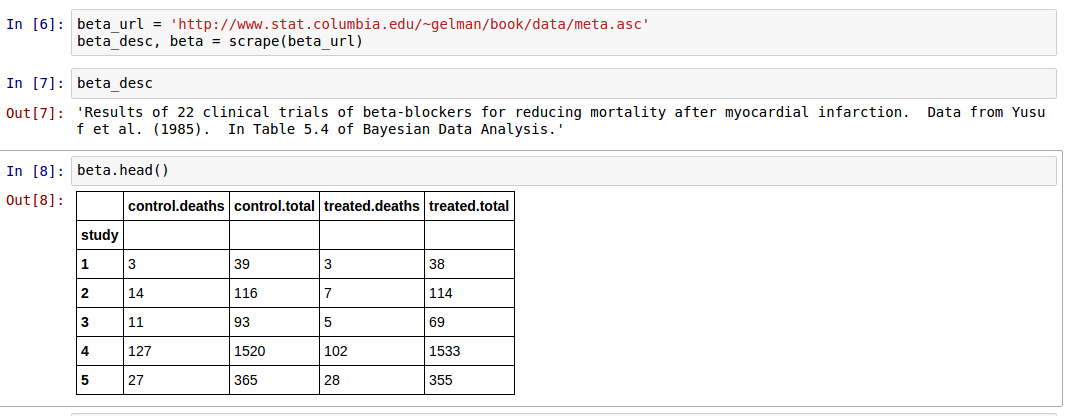

In [18]:
Image('../images/Scraping data.png')

Loading JSON data
----

JavaScript Object Notation (JSON) is a common way of storing data on the web.Python translates JSON into a list of nested dictinaries using the `json` module in the standard library. We will use biccyle crash data from the [Durham Open Data project](https://opendurham.nc.gov/page/home/) as an example.

In [19]:
import json

In [20]:
with open('../data/north_carolina_bicycle_crash_data_heatmap_.json') as f:
    data = json.load(f)

In [21]:
len(data)

5716

In [22]:
data[0]

{'datasetid': 'north_carolina_bicycle_crash_data_heatmap_',
 'fields': {'ambulancer': 'No',
  'bike_age': 6,
  'bike_alc_d': 'No',
  'bike_dir': 'Not Applicable',
  'bike_injur': 'C: Possible Injury',
  'bike_pos': 'Driveway / Alley',
  'bike_race': 'Black',
  'bike_sex': 'Female',
  'city': 'Durham',
  'county': 'Durham',
  'crash_date': '2007-01-06',
  'crash_grp': 'Bicyclist Failed to Yield - Midblock',
  'crash_hour': 13,
  'crash_loc': 'Non-Intersection',
  'crash_time': '0001-01-01T08:21:58-04:56',
  'crash_ty_1': 353311,
  'crash_type': 'Bicyclist Ride Out - Residential Driveway',
  'crash_year': '2007',
  'crashalcoh': 'No',
  'crashday': '01-01-06',
  'crsh_sevri': 'C: Possible Injury',
  'developmen': 'Residential',
  'drvr_age': 66,
  'drvr_alc_d': 'No',
  'drvr_estsp': '11-15 mph',
  'drvr_injur': 'O: No Injury',
  'drvr_race': 'Black',
  'drvr_sex': 'Male',
  'drvr_vehty': 'Pickup',
  'drvrage_gr': '60-69',
  'excsspdind': 'No',
  'hit_run': 'No',
  'i_fid': 18,
  'light_c

### Flatten the nested dictionaries recursively

In [23]:
def flatten(d, parent='', sep='_'):
    items = []
    for k, v in d.items():
        key = sep.join([parent, k]) if parent else k
        try:
            items.extend(flatten(v, key, sep=sep).items())
        except AttributeError:
            items.append((key, v))
    return dict(items)

In [24]:
flatten(data[0])

{'datasetid': 'north_carolina_bicycle_crash_data_heatmap_',
 'fields_ambulancer': 'No',
 'fields_bike_age': 6,
 'fields_bike_alc_d': 'No',
 'fields_bike_dir': 'Not Applicable',
 'fields_bike_injur': 'C: Possible Injury',
 'fields_bike_pos': 'Driveway / Alley',
 'fields_bike_race': 'Black',
 'fields_bike_sex': 'Female',
 'fields_city': 'Durham',
 'fields_county': 'Durham',
 'fields_crash_date': '2007-01-06',
 'fields_crash_grp': 'Bicyclist Failed to Yield - Midblock',
 'fields_crash_hour': 13,
 'fields_crash_loc': 'Non-Intersection',
 'fields_crash_time': '0001-01-01T08:21:58-04:56',
 'fields_crash_ty_1': 353311,
 'fields_crash_type': 'Bicyclist Ride Out - Residential Driveway',
 'fields_crash_year': '2007',
 'fields_crashalcoh': 'No',
 'fields_crashday': '01-01-06',
 'fields_crsh_sevri': 'C: Possible Injury',
 'fields_developmen': 'Residential',
 'fields_drvr_age': 66,
 'fields_drvr_alc_d': 'No',
 'fields_drvr_estsp': '11-15 mph',
 'fields_drvr_injur': 'O: No Injury',
 'fields_drvr_rac

#### Now we can easily put into a DataFrfame for analysis.

In [25]:
from pandas import DataFrame

In [26]:
df = DataFrame(flatten(d) for d in data)
df.head()

,datasetid,fields_ambulancer,fields_bike_age,fields_bike_alc_d,fields_bike_dir,fields_bike_injur,fields_bike_pos,fields_bike_race,fields_bike_sex,fields_bikeage_gr,...,fields_region,fields_rural_urba,fields_speed_limi,fields_traff_cntr,fields_weather,fields_workzone_i,geometry_coordinates,geometry_type,record_timestamp,recordid
0,north_carolina_bicycle_crash_data_heatmap_,No,6,No,Not Applicable,C: Possible Injury,Driveway / Alley,Black,Female,NaN,...,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,"[-78.8785, 36.002743]",Point,2015-04-21T05:55:44-04:00,696348a220ddd21dfcbd30cdc744147464ffd639
1,north_carolina_bicycle_crash_data_heatmap_,Yes,51,No,With Traffic,C: Possible Injury,Travel Lane,Black,Male,50-59,...,Coastal,Urban,40 - 45 MPH,Stop And Go Signal,Clear,No,"[-77.39265, 35.612984]",Point,2015-04-21T05:55:44-04:00,9e89f7103e3a849d289b1015e80c3d3f7a74d058
2,north_carolina_bicycle_crash_data_heatmap_,No,10,No,With Traffic,Injury,Travel Lane,Black,Male,NaN,...,Coastal,Rural,30 - 35 MPH,Stop Sign,Clear,No,"[-77.59074, 35.595676]",Point,2015-04-21T05:55:44-04:00,ed2998fdddd54956266ac4588b5e3e734ba6a419
3,north_carolina_bicycle_crash_data_heatmap_,Yes,17,No,NaN,B: Evident Injury,Travel Lane,White,Male,16-19,...,Piedmont,Urban,40 - 45 MPH,Stop And Go Signal,Cloudy,No,"[-80.7728, 35.076767]",Point,2015-04-21T05:55:44-04:00,77d8284533f319b61986fd4449ad5ea60b4f663a
4,north_carolina_bicycle_crash_data_heatmap_,No,6,No,Facing Traffic,O: No Injury,Travel Lane,Black,Male,NaN,...,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,"[-80.75713, 35.19999]",Point,2015-04-21T05:55:44-04:00,5accb69983a9ee89d7a184b1e4601b6baac7241a


XML
----

Antoher nested format that you may come across is XML. One way to preapare data in XML files for anlysis is to convert them to nested dictionariesN using the `xmltodict` library. We will try to extract the courses offered by Reed College from their course decrippiton XML file. [Source](http://www.cs.washington.edu/research/xmldatasets/data/courses/reed.xml)

In [27]:
! pip install xmltodict

  Running setup.py bdist_wheel for xmltodict
  Stored in directory: /Users/cliburn/Library/Caches/pip/wheels/ac/89/8d/1d837ec2a459406472f0586d7fe560dc9dec5bc87c4f171a2b
Successfully built xmltodict


In [28]:
import xmltodict

#### Download file if necessary

In [29]:
import os

if not os.path.exists('../data/reed.xml'):
    import requests
    resp = requests.get('http://www.cs.washington.edu/research/xmldatasets/data/courses/reed.xml')
    with opne('../data/reed.xml', 'w') as f:
        f.write(resp.content)

#### Convert XML to nested dictionary

In [30]:
with open('../data/reed.xml') as f:
    xml = f.read()
    d = xmltodict.parse(xml)

#### Find courses data

In [31]:
d.keys()

odict_keys(['root'])

In [32]:
d['root'].keys()

odict_keys(['course'])

In [33]:
courses = d['root']['course']

In [34]:
len(courses)

703

In [35]:
df = DataFrame(flatten(d) for d in courses)
df.head()

,crse,days,instructor,place_building,place_room,reg_num,sect,subj,time_end_time,time_start_time,title,units
0,211,M-W,Brightman,ELIOT,414,10577,F01,ANTH,04:30,03:10PM,Introduction to Anthropology,1.0
1,344,T-Th,Makley,VOLLUM,120,20573,S01,ANTH,11:50,10:30AM,Sex and Gender,1.0
2,431,T,Kaplan,PHYSIC,240A,10624,F01,BIOL,08:00,06:10PM,Field Biology of Amphibians,0.5
3,431,None,None,None,Mellies RESCHEDULED TO OTHER SEMESTER,10626,F03,BIOL,None,None,Bacterial Pathogenesis,0.5
4,431,Th,Yezerinac,BIOL,200A,20626,S04,BIOL,08:00,06:10PM,Seminar in Biology,0.5
